# Iris KNN 다중 분류

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [9]:
iris = pd.read_csv('datasets/iris.csv')

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
iris[iris.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [13]:
df = iris.copy()

In [17]:
df['Species'].map({'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}).unique()

array([0, 1, 2], dtype=int64)

In [18]:
df['Species'] = df['Species'].map({'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2})

In [19]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [24]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,1:5]
y = df.iloc[:,5]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2022, stratify = y, shuffle = True)

x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
74,6.4,2.9,4.3,1.3
119,6.0,2.2,5.0,1.5
82,5.8,2.7,3.9,1.2
145,6.7,3.0,5.2,2.3
5,5.4,3.9,1.7,0.4


In [26]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
#tqdm으로 모델이 돌아가고 있는지 확인 가능

hist = []

for k in tqdm(range(3,50)):
    model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'accuracy')
    
    hist.append(scores.mean())
    
# 교차 검증을 하여 k의 값이 얼마 일 때 좋은 모델인지 찾을 수 있다.

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 76.10it/s]


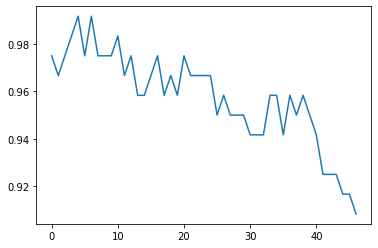

In [29]:
plt.plot(hist)

In [30]:
np.argmax(hist)

4

In [31]:
hist[4]

0.9916666666666668

In [39]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):
    
    print('정확도 : {}'.format(accuracy_score(y_test, y_pred)))
    
print_score(y_test, y_pred)

정확도 : 0.9666666666666667
